[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Aquarium Dataset
https://public.roboflow.com/ds/4Nbn3Nc230?key=28HuKn4xSb

In [1]:
# 현재 GPU가 어떤 것이 할당되었는지 확인
# 혹시... CPU는 아니겠죠
!nvidia-smi

Thu Nov 16 06:27:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    26W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# 현재 작업디렉토리 확인
import os
HOME = os.getcwd()
print(HOME)

/home/jupyter


In [48]:
!python --version

Python 3.10.13


In [50]:
import IPython

IPython.__version__

'8.17.2'

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.13 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)
Setup complete ✅ (4 CPUs, 14.6 GB RAM, 34.1/98.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
# confidence값(확신) conf=0.25
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/home/jupyter
100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 79.2MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.13 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 52.6MB/s]
image 1/1 /home/jupyter/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 15.2ms
Speed: 3.0ms pre-process, 15.2ms inference, 30.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/home/jupyter


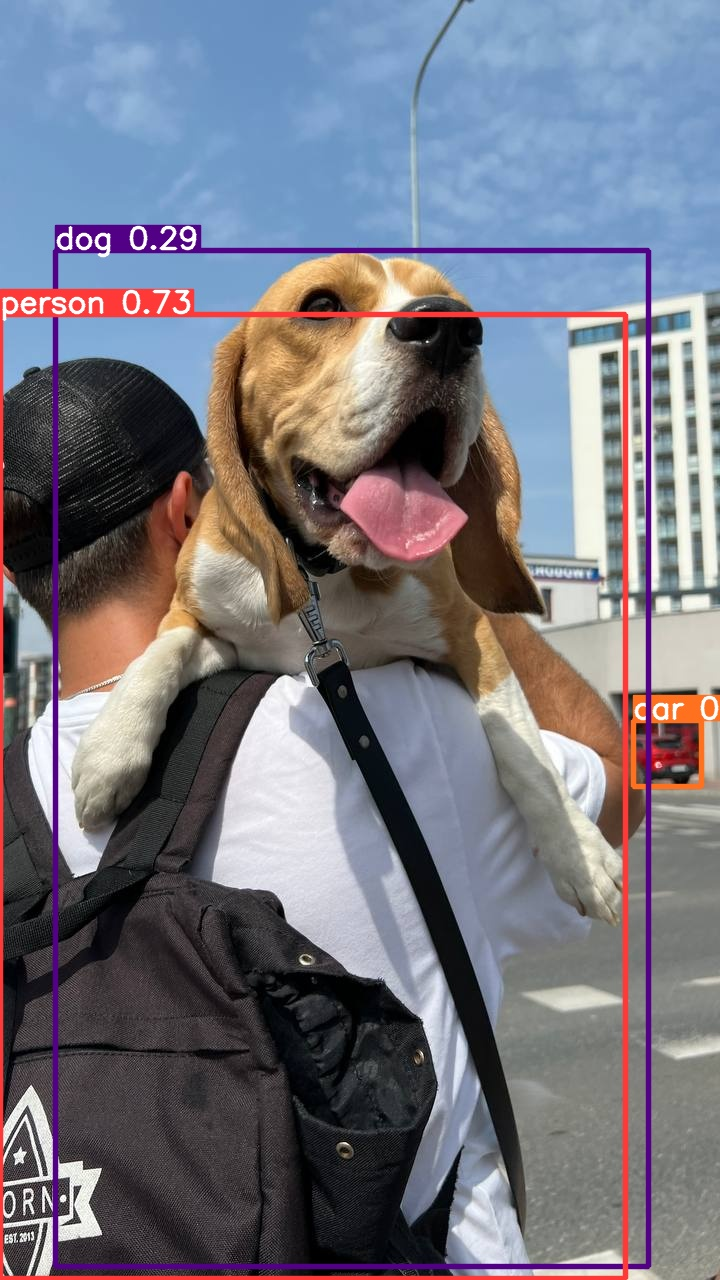

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [7]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.13 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [8]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [9]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [10]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

- 0 : person
- 16 : dog
- 2 : car

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [6]:
trainPath = '{}/datasets/train'.format(HOME)
trainPath

'/home/jupyter/datasets/train'

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

# 데이터셋 다운로드, 압축풀기, 압축파일

# # 아쿠아리움 데이터셋
# if os.path.exists(trainPath) == False:
#     !curl -L "https://public.roboflow.com/ds/4Nbn3Nc230?key=28HuKn4xSb" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# # pothole 데이터셋
# if os.path.exists(trainPath) == False:
#     !curl -L "https://public.roboflow.com/ds/mFEwTFJFg8?key=p5RbtOqMGv" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# customDataset1 -> roboflow에서 레이블하고 생성한 데이터셋
if os.path.exists(trainPath) == False:
    !curl -L "https://app.roboflow.com/ds/laf2dC3OiM?key=lKiz6hZXnv" >roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR_API_KEY")
# project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
# dataset = project.version(1).download("yolov8")

/home/jupyter/datasets
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   3360      0 --:--:-- --:--:-- --:--:--  3360
100 6423k  100 6423k    0     0  9150k      0 --:--:-- --:--:-- --:--:-- 9150k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/20231116_140729_jpg.rf.4e15b1000957730e8fa50aefd0570292.jpg  
 extracting: test/images/20231116_140959_jpg.rf.f57592b40e1ab92dac7244aa3a1a6aef.jpg  
 extracting: test/images/20231116_141152_jpg.rf.9ba21448c45342d0c149b76636785c73.jpg  
 extracting: test/images/20231116_141520_jpg.rf.1306d93176024bc735d01fe462fa2ab2.jpg  
 extracting: test/images/20231116_141751_jpg.rf.3a529526928aaf74155dba7517914ccf.jpg  
 extracting: test/images/20231116_142031_jpg

압축 풀고 압축파일 삭제까지 한 큐에

## Custom Training

In [36]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={HOME}/datasets/data.yaml epochs=75 imgsz=800 plots=True batch=64 #device=0,1

/home/jupyter
Ultralytics YOLOv8.0.20 🚀 Python-3.10.13 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/home/jupyter/datasets/data.yaml, epochs=75, patience=50, batch=64, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, 

In [37]:
!ls {HOME}/runs/detect/train5/

F1_curve.png  confusion_matrix.png
PR_curve.png  events.out.tfevents.1700123793.instance-20231116-134743.50137.0
P_curve.png   results.csv
R_curve.png   results.png
args.yaml     weights


/home/jupyter


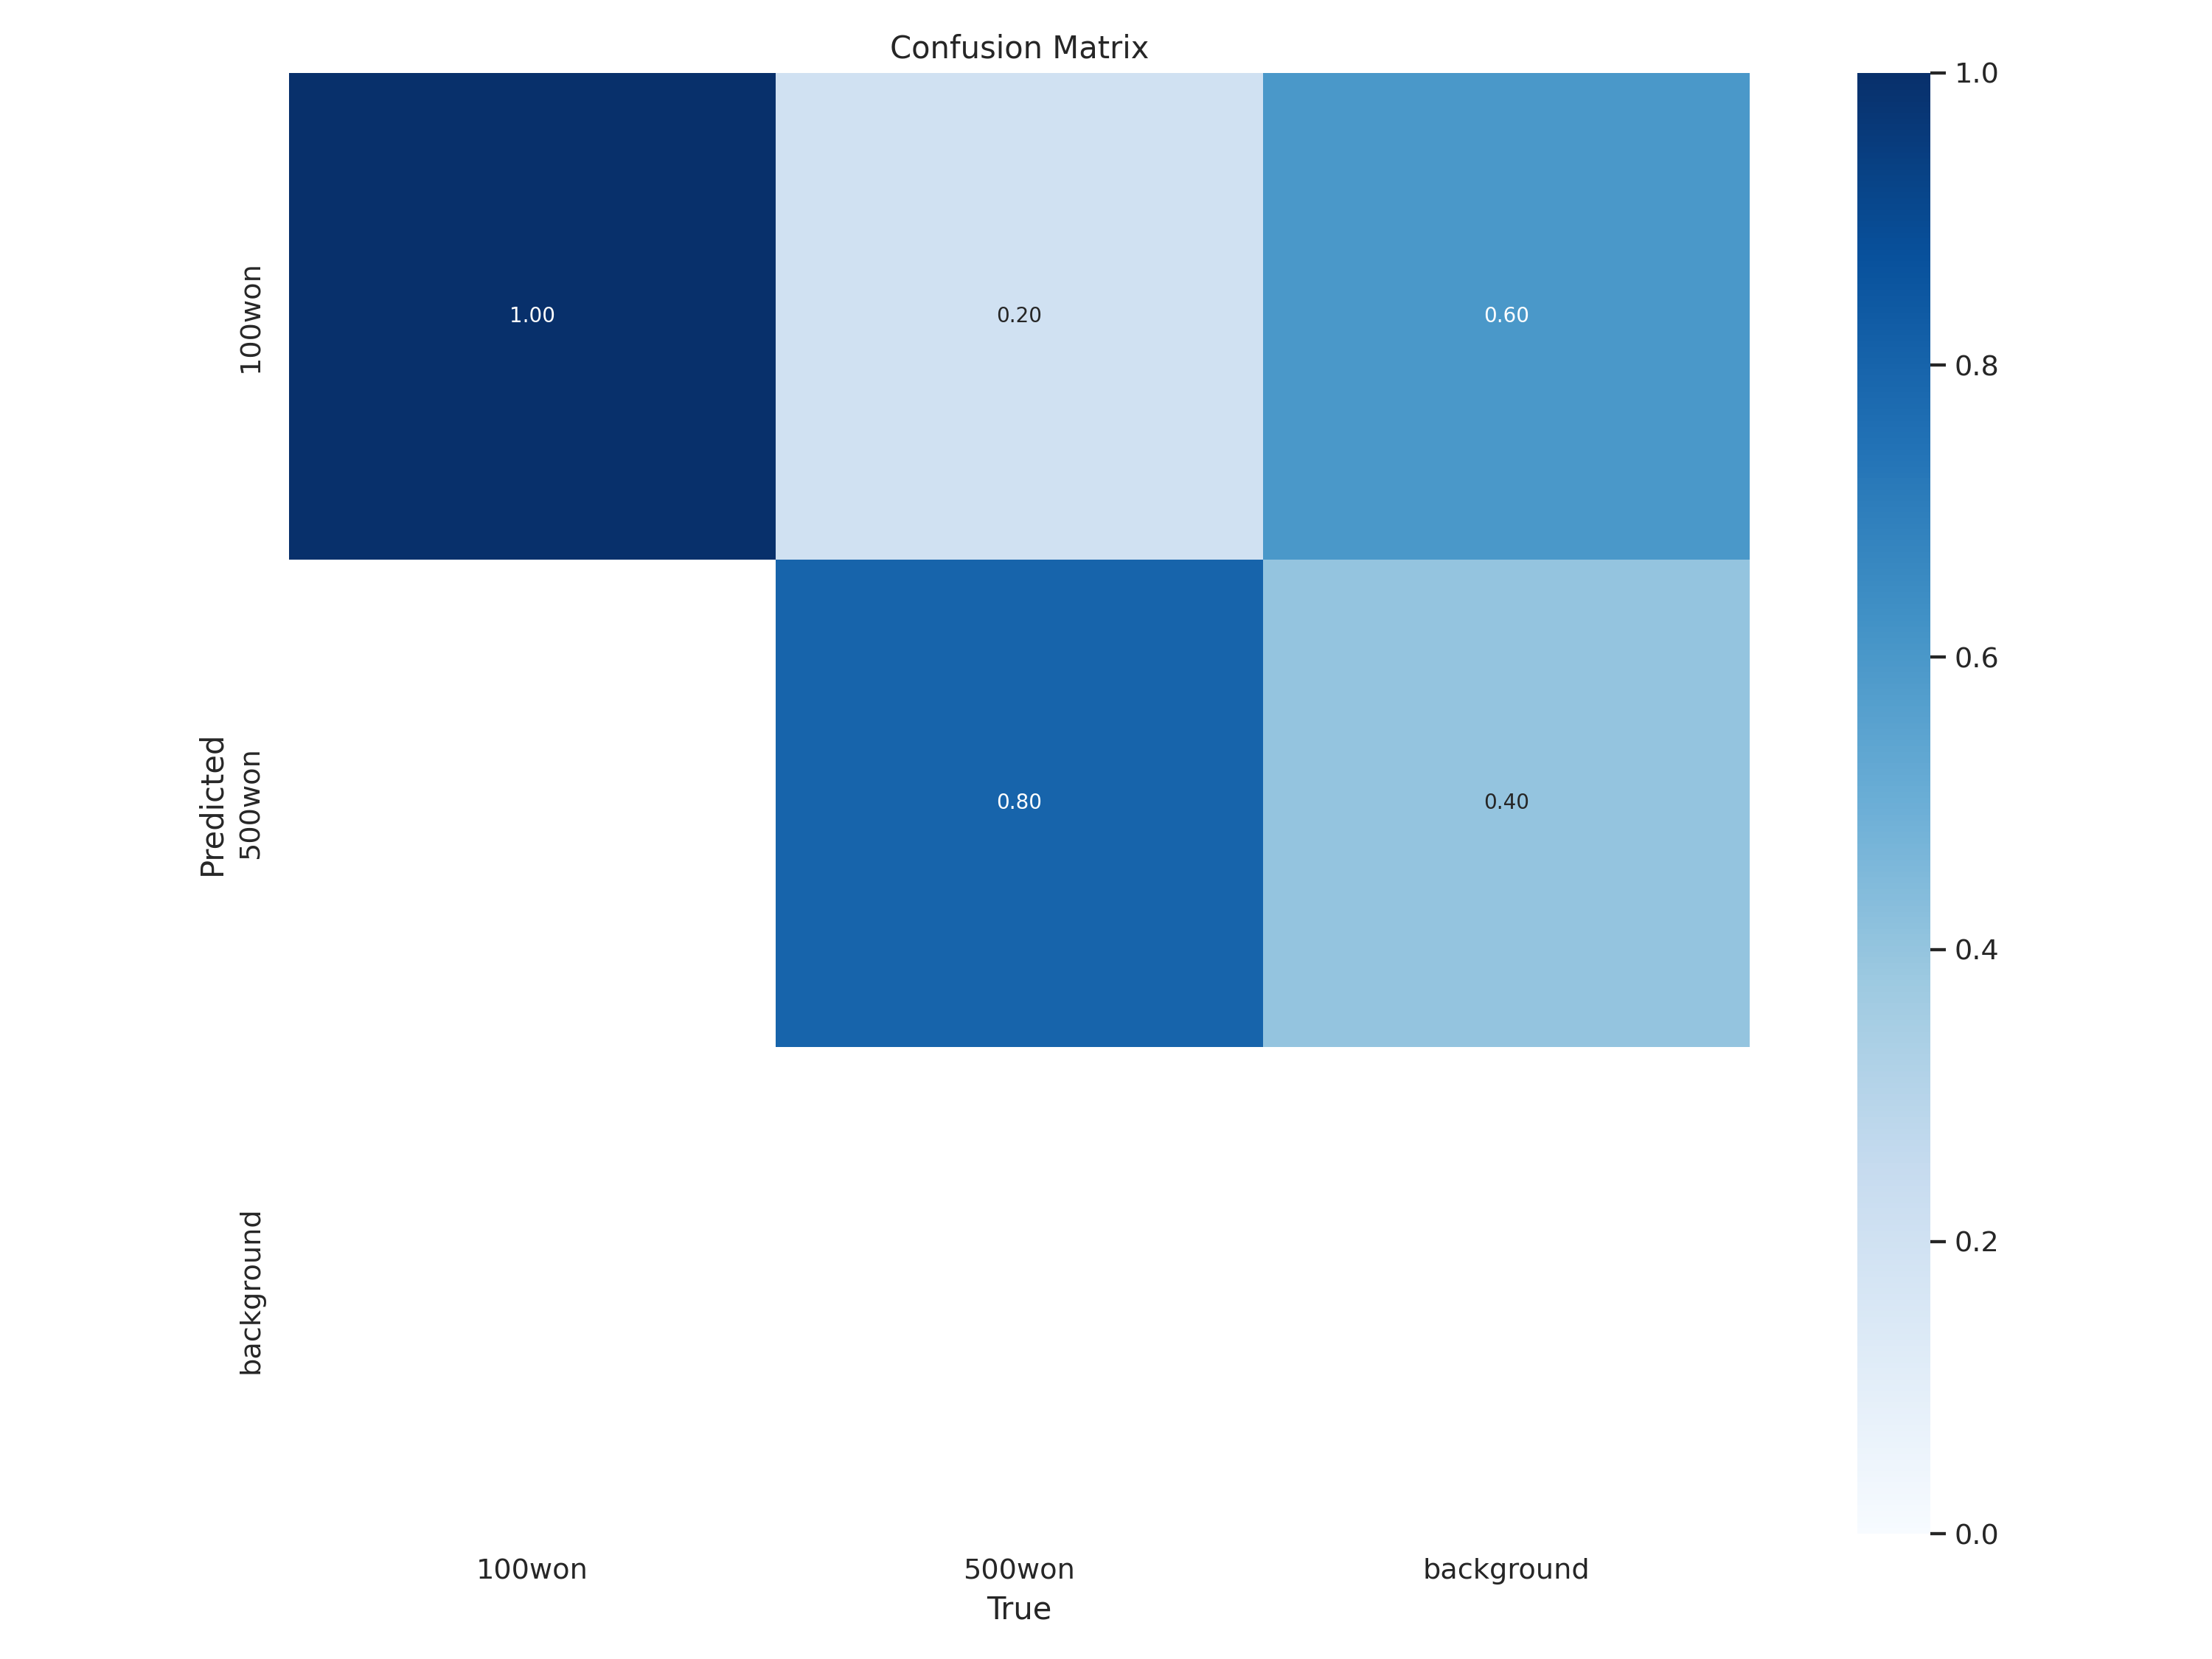

In [38]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

/home/jupyter


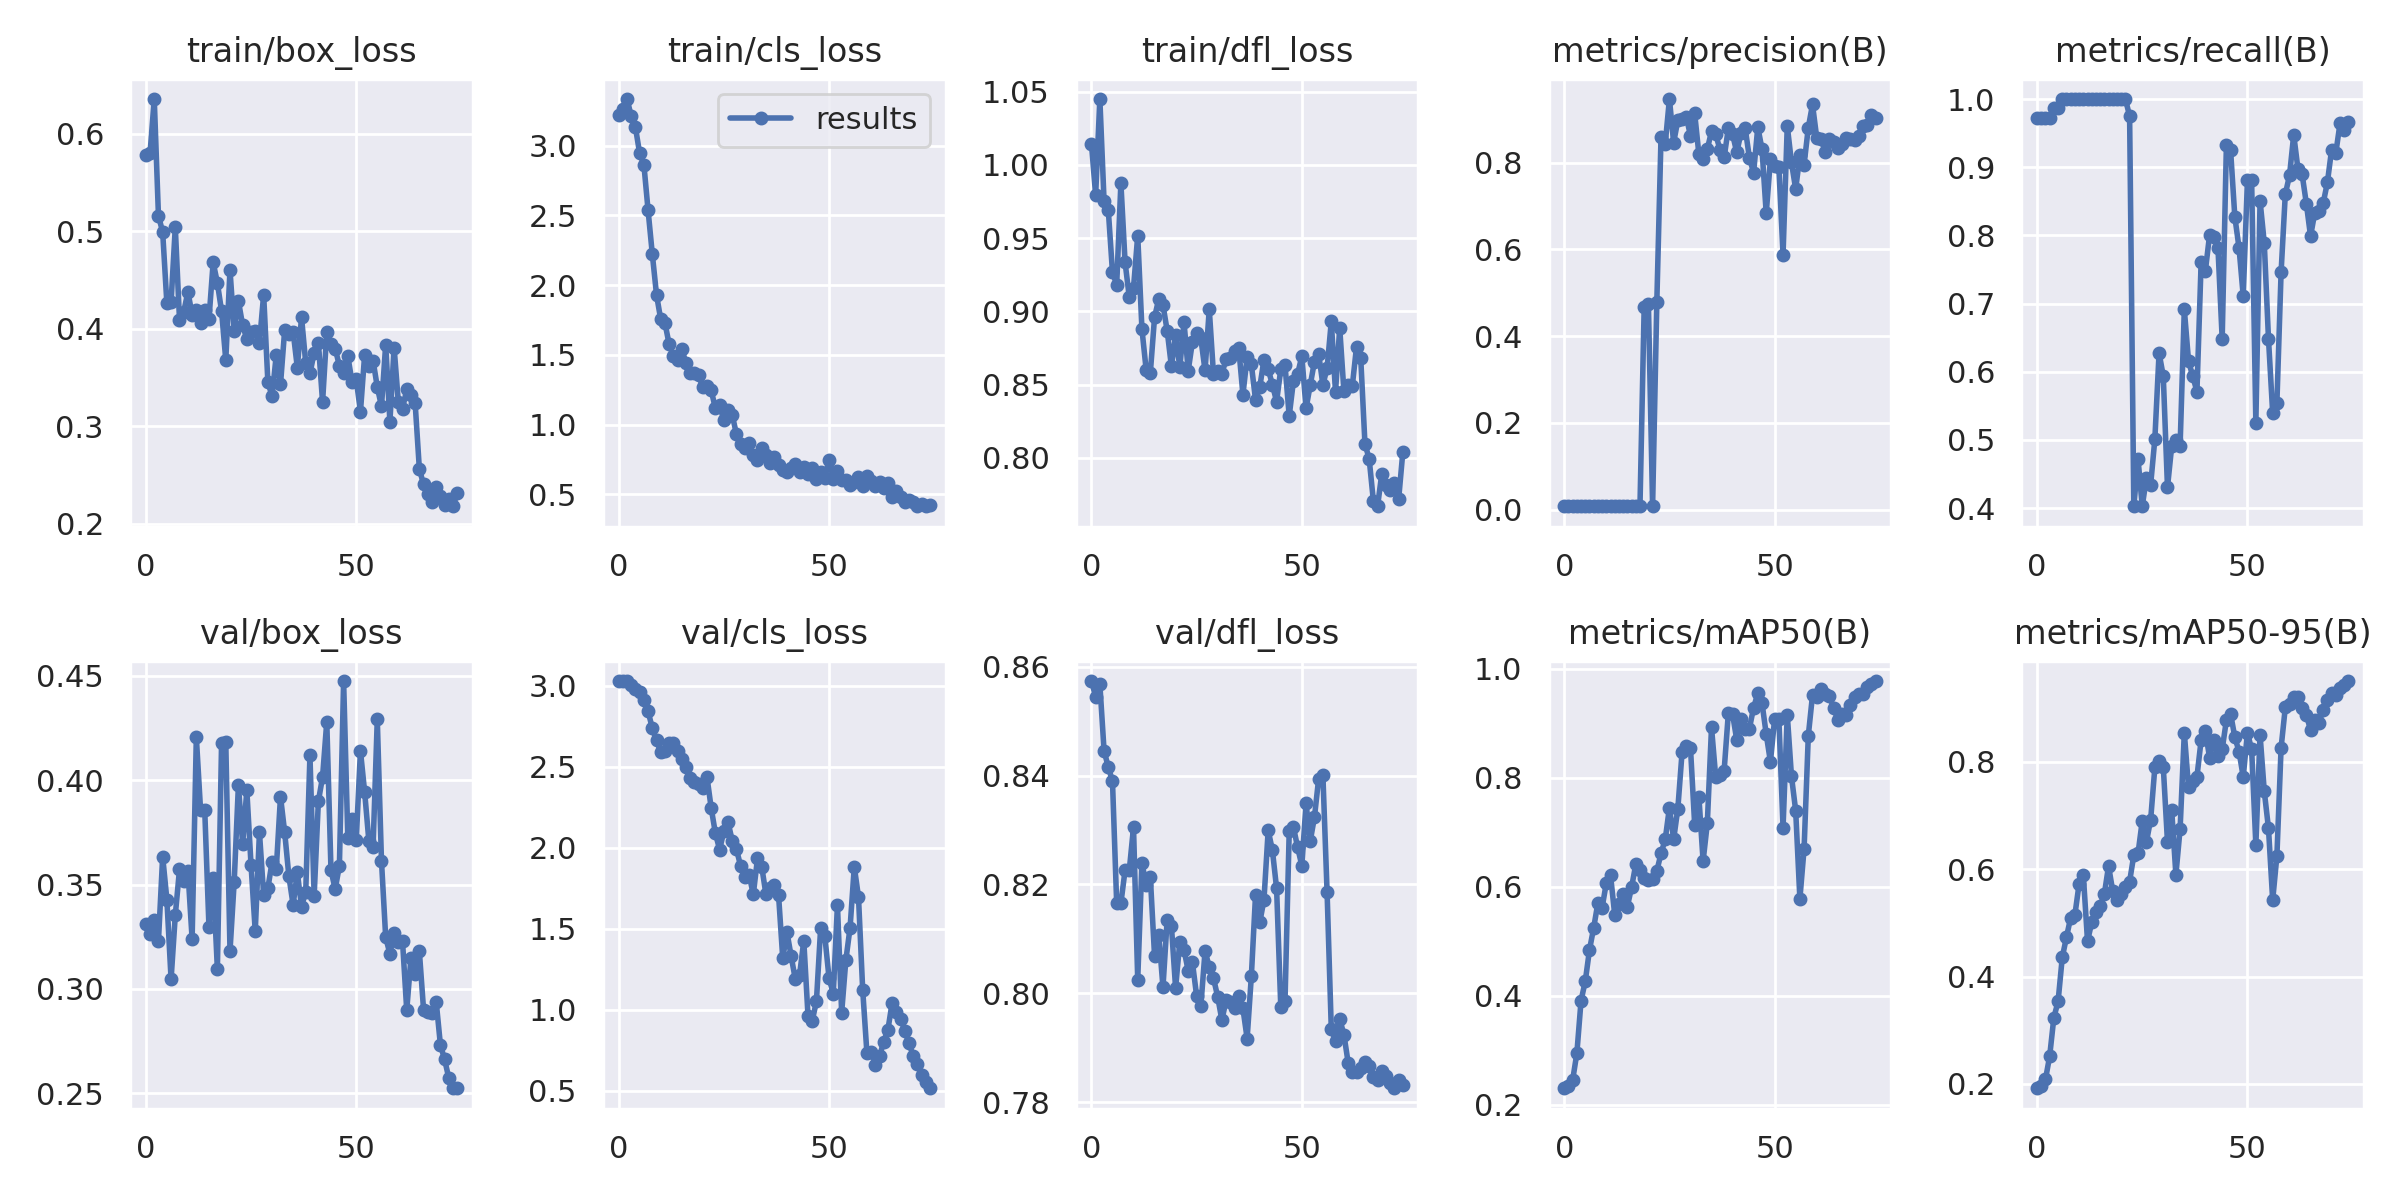

In [39]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=600)

## Validate Custom Model

In [40]:
!echo {HOME}

/home/jupyter


In [42]:
!yolo task=detect mode=val model={HOME}/runs/detect/train5/weights/best.pt data={HOME}/datasets/data.yaml

Ultralytics YOLOv8.0.20 🚀 Python-3.10.13 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/jupyter/datasets/valid/labels.cache... 22 images, 0 backgrou
                 Class     Images  Instances      Box(P          R      mAP50  m
Exception in thread Thread-3 (plot_images):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.10/site-packages/sentry_sdk/integrations/threading.py", line 72, in run
    reraise(*_capture_exception())
  File "/opt/conda/lib/python3.10/site-packages/sentry_sdk/_compat.py", line 115, in reraise
    raise value
  File "/opt/conda/lib/python3.10/site-packages/sentry_sdk/integrations/threading.py", line 70, in run
    return old_run_func(self, *a, **kw)
  File "/opt/conda/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args,

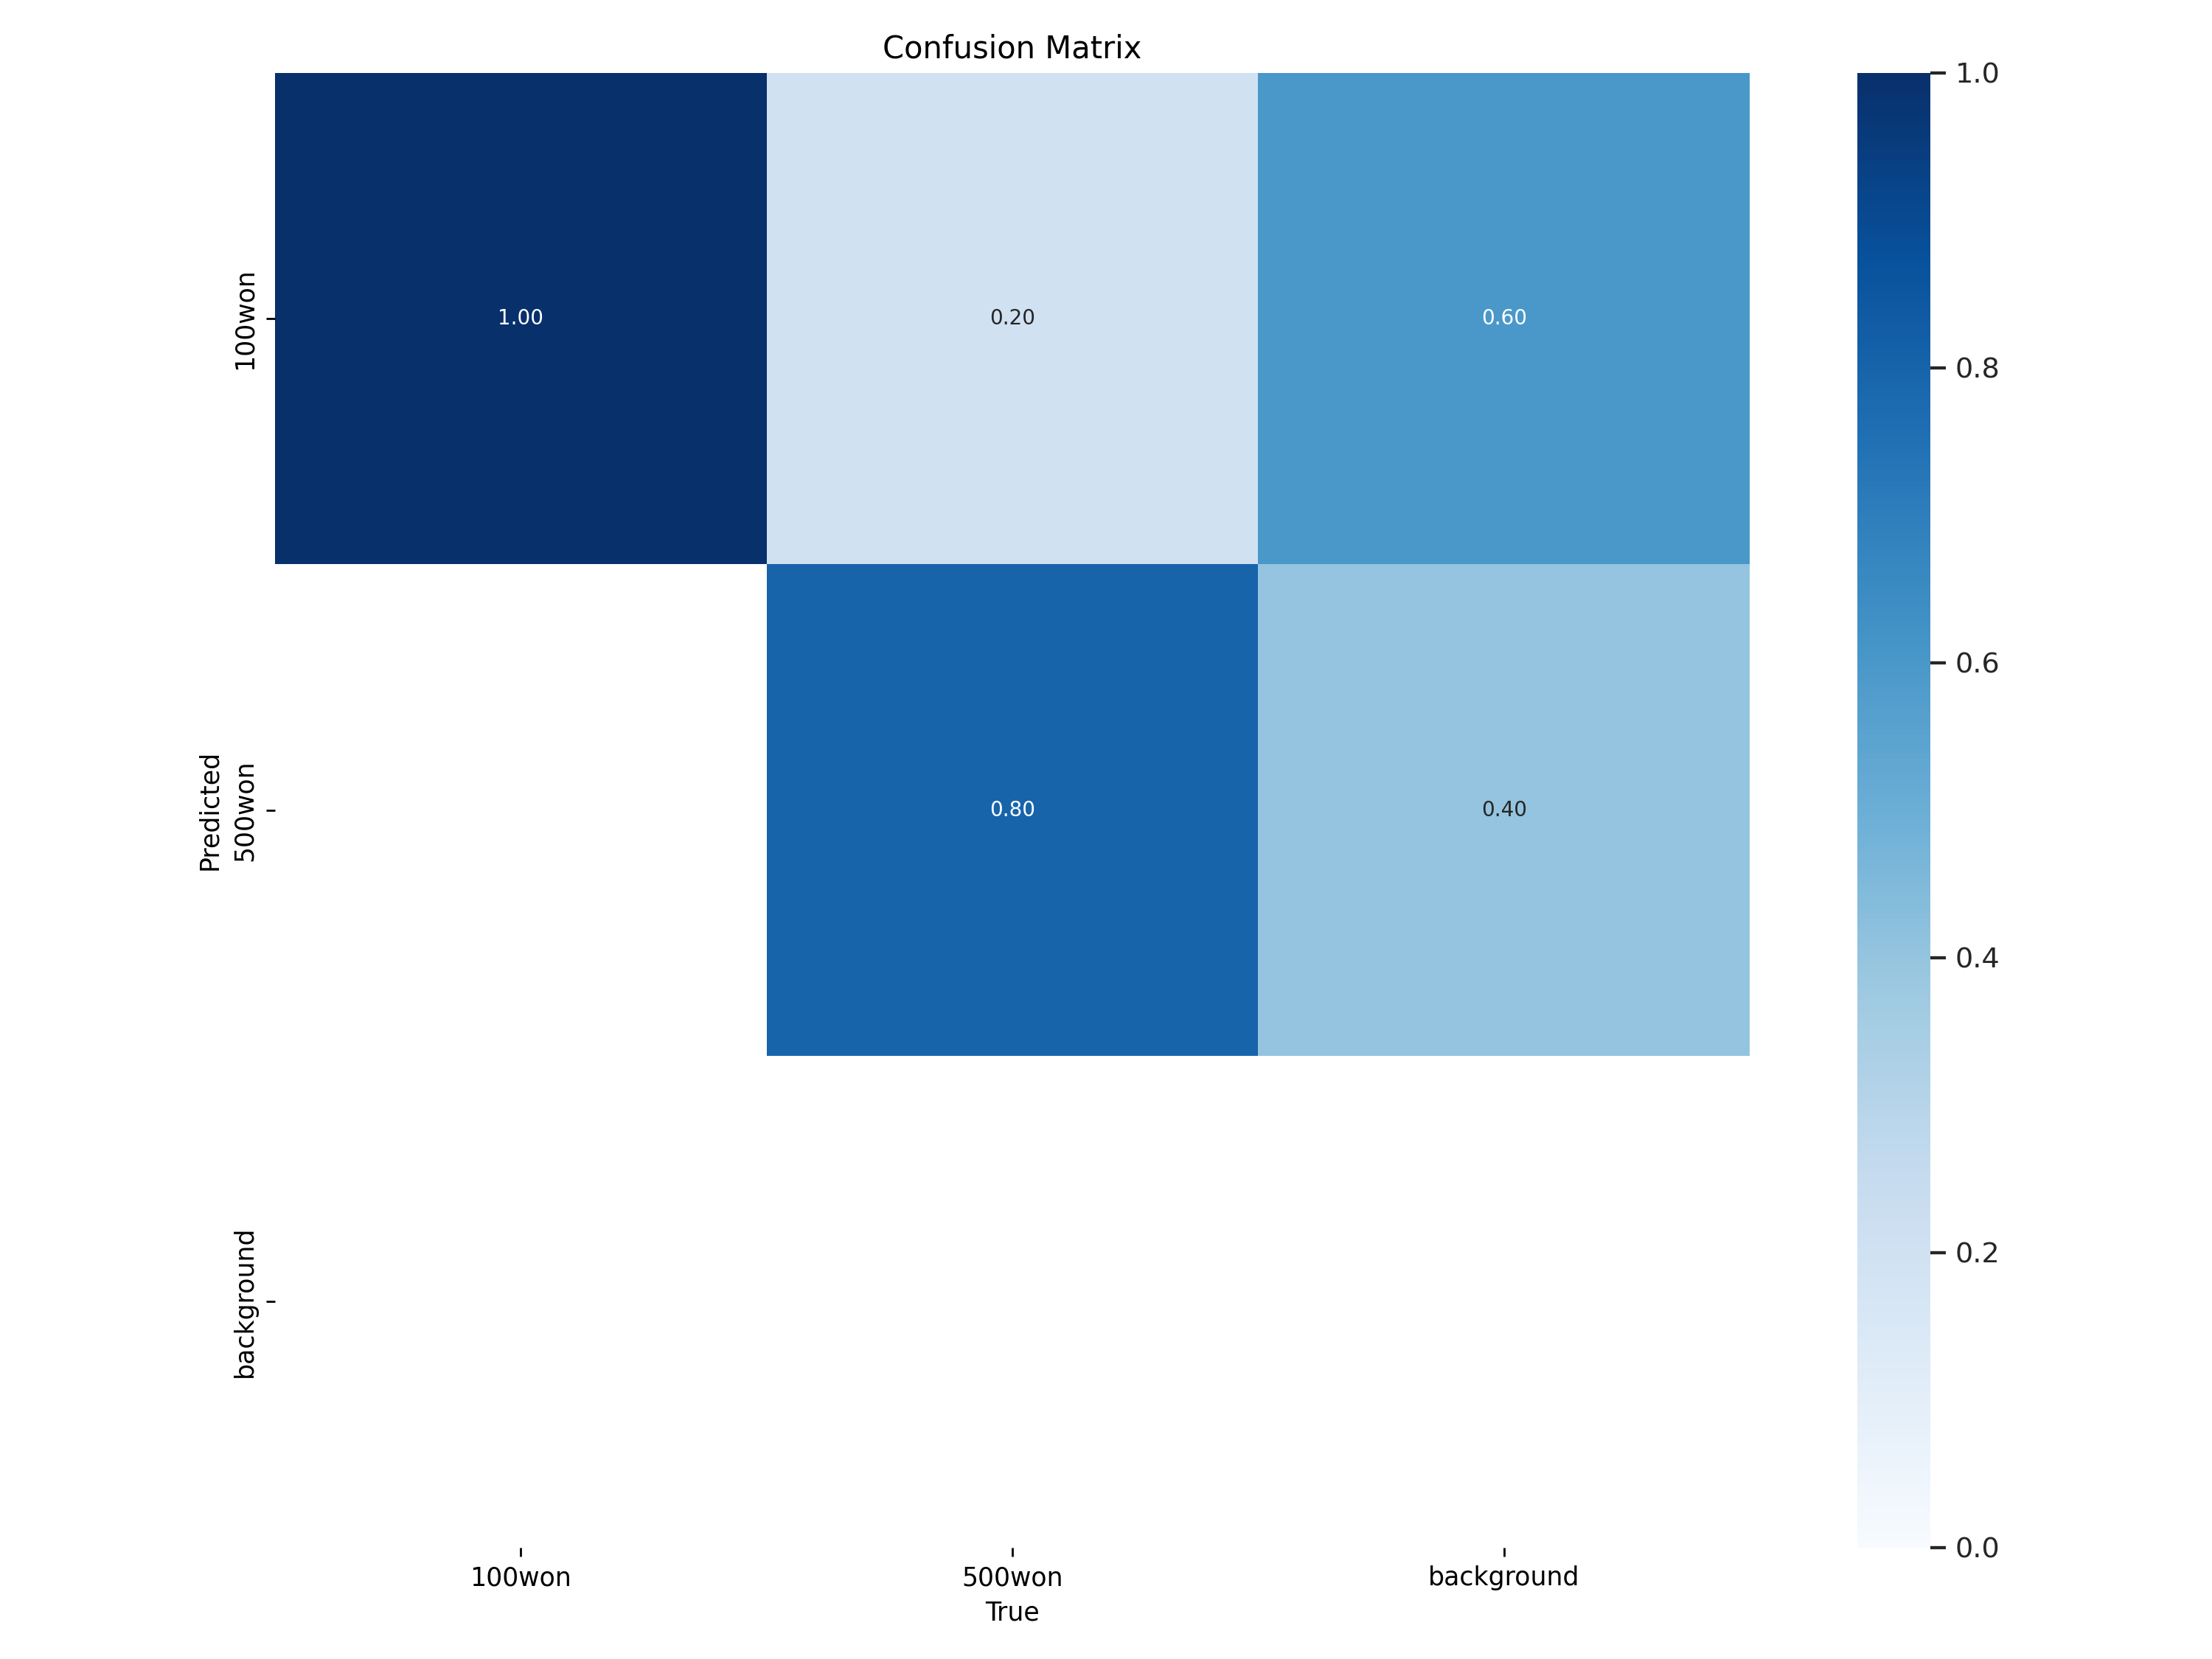

In [44]:
# %cd {HOME}
Image(filename=f'{HOME}/runs/detect/val5/confusion_matrix.png', width=600)

## Inference with Custom Model

In [45]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source={HOME}/datasets/test/images save=True

/home/jupyter
Ultralytics YOLOv8.0.20 🚀 Python-3.10.13 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-16GB, 16161MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
image 1/11 /home/jupyter/datasets/test/images/20231116_140729_jpg.rf.4e15b1000957730e8fa50aefd0570292.jpg: 800x800 2 100wons, 1 500won, 10.6ms
image 2/11 /home/jupyter/datasets/test/images/20231116_140959_jpg.rf.f57592b40e1ab92dac7244aa3a1a6aef.jpg: 800x800 2 100wons, 1 500won, 10.2ms
image 3/11 /home/jupyter/datasets/test/images/20231116_141152_jpg.rf.9ba21448c45342d0c149b76636785c73.jpg: 800x800 2 100wons, 1 500won, 9.7ms
image 4/11 /home/jupyter/datasets/test/images/20231116_141520_jpg.rf.1306d93176024bc735d01fe462fa2ab2.jpg: 800x800 2 100wons, 1 500won, 9.6ms
image 5/11 /home/jupyter/datasets/test/images/20231116_141751_jpg.rf.3a529526928aaf74155dba7517914ccf.jpg: 800x800 2 100wons, 1 500won, 9.4ms
image 6/11 /home/jupyter/datasets/test/images/20231116_142031_jpg.rf.d8fb629966217b5fcb2ffe100b

In [18]:
!cp {HOME}/runs/detect/train5/weights/best.pt {HOME}/savedModel/custom_Yolov8n.pt

cp: cannot create regular file '/home/jupyter/savedModel/custom_Yolov8n.pt': No such file or directory


**NOTE:** Let's take a look at few results.

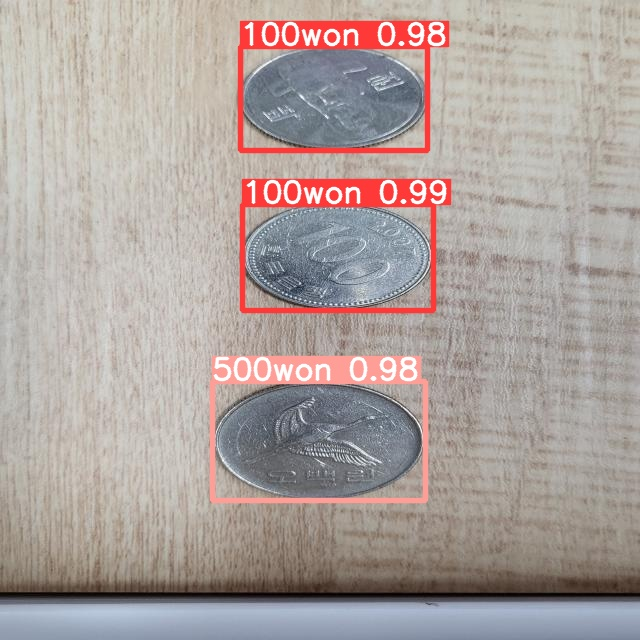

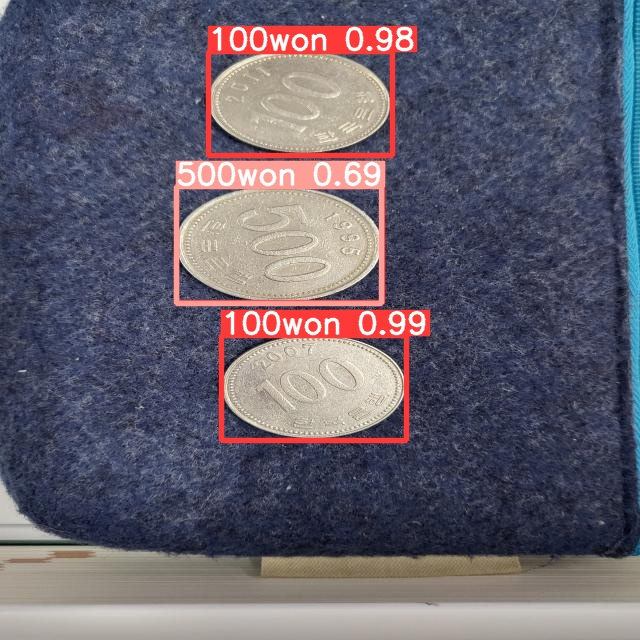

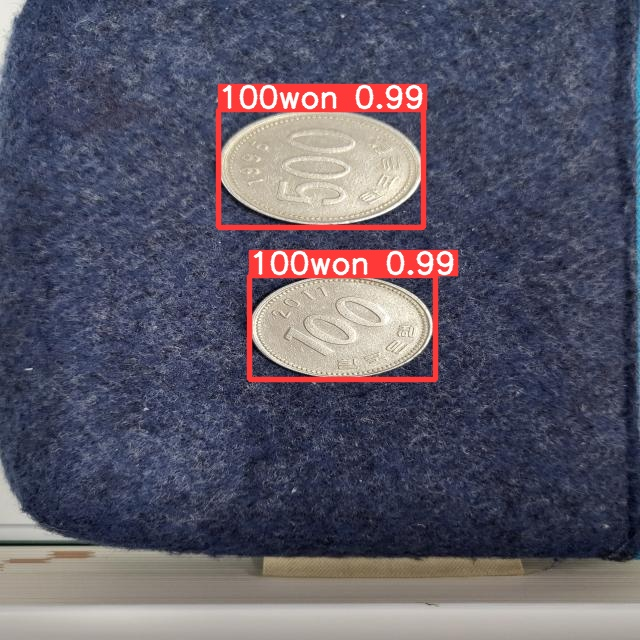

In [46]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
'''
source에 숫자를 넣으면 카메라 번호 (webcam)
source에 jpg나 png같은 파일을 넣으면 정지 이미지
source에 인터넷 경로를 넣으면 인터넷 파일 참조
source에 동영상을 넣으면 동영상 이미지 참조
'''
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source=0 show=True

In [ ]:
# # task를 변경하고 model을 변경하면 다른 종류의 task를 실행
# !yolo task=segment mode=predict model=yolov8l-seg.pt source=0 show=True
# !yolo task=classify mode=predict model=yolov8x-cls.pt source='input/video_3.mp4' show=True

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.

## **데이터셋을 구글 드라이브로 다운로드하고 확인하기 위한 코드**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#savePath = '/content/drive/MyDrive/[23년]IoT가전재직자교육2/코드/'

In [ ]:
# Python문자열을 CLI에서 사용하려면 "{}"안에 Python문자열을 넣어주면 사용가능
#!curl -L "https://public.roboflow.com/ds/4Nbn3Nc230?key=28HuKn4xSb" > {savePath}roboflow.zip

In [23]:
import os

os.getcwd()

'/home/jupyter'

In [34]:
import shutil

shutil.make_archive('datasets', 'zip', './datasets')

'/home/jupyter/datasets.zip'

In [35]:
shutil.make_archive('runs', 'zip', './runs')

'/home/jupyter/runs.zip'